In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Load the Dataset
events = pd.read_csv('events.csv')
events.head()


,id_odsp,id_event,sort_order,time,text,event_type,event_type2,side,event_team,opponent,...,player_in,player_out,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break
0,UFot0hit/,UFot0hit1,1,2,Attempt missed. Mladen Petric (Hamburg) left f...,1,12.0,2,Hamburg SV,Borussia Dortmund,...,NaN,NaN,6.0,2.0,0,9.0,2.0,1,1.0,0
1,UFot0hit/,UFot0hit2,2,4,"Corner, Borussia Dortmund. Conceded by Dennis...",2,NaN,1,Borussia Dortmund,Hamburg SV,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
2,UFot0hit/,UFot0hit3,3,4,"Corner, Borussia Dortmund. Conceded by Heiko ...",2,NaN,1,Borussia Dortmund,Hamburg SV,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
3,UFot0hit/,UFot0hit4,4,7,Foul by Sven Bender (Borussia Dortmund).,3,NaN,1,Borussia Dortmund,Hamburg SV,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
4,UFot0hit/,UFot0hit5,5,7,Gokhan Tore (Hamburg) wins a free kick in the ...,8,NaN,2,Hamburg SV,Borussia Dortmund,...,NaN,NaN,NaN,NaN,0,2.0,NaN,0,NaN,0


In [3]:

#Creating Dict objects to change columns.
event_type= {
    0:'Announcement',
1:'Attempt',
2:'Corner',
3:'Foul',
4:'Yellow card',
5:'Second yellow card',
6:'Red card',
7:'Substitution',
8:'Free kick won',
9:'Offside',
10:'Hand ball',
11:'Penalty conceded'
}

event_type2 = {
12:'Key Pass',
13:'Failed through ball',
14:'Sending off',
15:'Own goal'
}

side ={
1:'Home',
2:'Away'  
   }

shot_place = {
1 : 'Bit too high',
2 :'Blocked',
3 :'Bottom left corner',
4 :'Bottom right corner',
5 : 'Centre of the goal',
6 : 'High and wide',
7 : 'Hits the bar',
8 : 'Misses to the left',
9 : 'Misses to the right',
10 : 'Too high',
11 :'Top centre of the goal',
12 :'Top left corner',
13 :'Top right corner'

}


shot_outcome = {
1:'On target',
2:'Off target',
3:'Blocked',
4:'Hit the bar',
}
    
location = {
1:'Attacking half',
2:'Defensive half',
3:'Centre of the box',
4:'Left wing',
5:'Right wing',
6:'Difficult angle and long range',
7:'Difficult angle on the left',
8:'Difficult angle on the right',
9:'Left side of the box',
10:'Left side of the six yard box',
11:'Right side of the box',
12:'Right side of the six yard box',
13:'Very close range',
14:'Penalty spot',
15:'Outside the box',
16:'Long range',
17:'More than 35 yards',
18:'More than 40 yards',
19:'Not recorded'

}


bodypart = {
1:'right foot',
2:'left foot',
3:'head'
}

assist_method = {
0:'None',
1:'Pass',
2:'Cross',
3:'Headed pass',
4:'Through ball'
}

situation = {
1:'Open play',
2:'Set piece',
3:'Corner',
4:'Free kick'
   
}  

In [4]:
# getting team name to  bifurcate according to leagues
events.event_team.unique()

array(['Hamburg SV', 'Borussia Dortmund', 'FC Augsburg', 'SC Freiburg',
       'Werder Bremen', 'Kaiserslautern', 'Lorient', 'Paris Saint-Germain',
       'Valenciennes', 'Caen', 'Hertha Berlin', 'Nurnberg',
       'Evian Thonon Gaillard', 'Brest', 'AC Ajaccio', 'Toulouse', 'Nice',
       'Lyon', 'VfL Wolfsburg', 'FC Cologne', 'AS Nancy Lorraine', 'Lille',
       'Montpellier', 'AJ Auxerre', 'VfB Stuttgart', 'Schalke 04',
       'Hannover 96', 'TSG Hoffenheim', 'Sochaux', 'Marseille', 'Bordeaux',
       'St Etienne', 'Stade Rennes', 'Dijon FCO', 'Mainz',
       'Bayer Leverkusen', 'Bayern Munich', 'Borussia Monchengladbach',
       'Sporting Gijon', 'Real Sociedad', 'Valencia', 'Racing Santander',
       'Real Madrid', 'Real Zaragoza', 'Sevilla', 'Malaga',
       'Rayo Vallecano', 'Athletic Bilbao', 'Getafe', 'Levante', 'Osasuna',
       'Atletico Madrid', 'Espanyol', 'Mallorca', 'Villarreal',
       'Barcelona', 'AC Milan', 'Lazio', 'Cesena', 'Napoli',
       'Internazionale', 'Palerm

In [5]:
#creating lists of leagues according to team name 
seria_a = ['Napoli','Juventus','Siena','Atalanta','Bastia','Catania','Genoa','AC Milan',
           'Palermo','Internazionale','Parma','AS Roma','Cagliari','Fiorentina','Bologna',
           'Lazio','Udinese','Sampdoria','Torino','Livorno','Empoli','Chievo Verona','Novara',
           'US Pescara','Hellas Verona','Frosinone','Carpi','Sassuolo','Cesena','Lecce','Crotone']

Bundesliga= ['Hamburg SV','Borussia Dortmund','FC Augsburg','SC Freiburg','Werder Bremen',
             'Borussia Monchengladbach','Bayern Munich','Bayer Leverkusen','Eintracht Frankfurt',
             'TSV Eintracht Braunschweig','Hertha Berlin','VfB Stuttgart','Schalke 04',
            'Hannover 96','RB Leipzig','VfL Wolfsburg','Nurnberg','FC Cologne',
             'Fortuna Dusseldorf','SV Darmstadt 98','TSG Hoffenheim','Kaiserslautern',
             'SpVgg Greuther Furth','FC Ingolstadt 04','SC Paderborn', 'Mainz']

LigaBBVA = ['Sporting Gijon','Real Madrid','Rayo Vallecano','Atletico Madrid','Barcelona',
            'Real Sociedad','Real Zaragoza','Athletic Bilbao','Espanyol','Valencia','Sevilla',
            'Getafe','Mallorca','Racing Santander','Malaga', 'Levante','Villarreal','Osasuna',
            'Deportivo La Coruna','Granada','Real Betis','Alaves','Real Valladolid','Celta Vigo',
            'Cordoba','Leganes','Las Palmas','Almeria','Elche','Eibar']

PremierlLeague =[ 'Aston Villa','Sunderland','Everton','West Brom','Norwich City','Leicester City','Hull',
                'Manchester Utd','Manchester City','Arsenal','Swansea','Burnley','Bournemouth','Fulham','Liverpool',
                'Newcastle','West Ham','Southampton','Tottenham','Stoke City','Crystal Palace','Cardiff','Chelsea',
                'QPR','Middlesbrough','Watford']

Ligue_1=['Paris Saint-Germain','Bordeaux','Lille','Nice','Toulouse','Lyon','Montpellier','St Etienne','AS Monaco',
         'Stade de Reims', 'Marseille','AS Nancy Lorraine','Valenciennes','Evian Thonon Gaillard','GFC Ajaccio',
         'Stade Rennes','AJ Auxerre','Brest','Caen','Lorient','AC Ajaccio','Sochaux','Dijon FCO',
         'Guingamp','Troyes','Nantes','Metz','Lens','Angers']

In [6]:
# function to map team to league
def leagueMapping(data):
    if data in seria_a:
        return 'seria_a'
    if data in Bundesliga:
        return 'Bundesliga'
    if data in LigaBBVA:
        return 'LigaBBVA'
    if data in PremierlLeague:
        return 'PremierlLeague'
    if data in Ligue_1:
        return 'Ligue_1'

In [7]:

# creating new column League to mapping team accordingly
events['league']= events['event_team'].apply(leagueMapping)

In [8]:

 # Mapping the dicts onto the events dataframe
events['event_type']= events['event_type'].map(event_type)
events['event_type2']= events['event_type2'].map(event_type2)
events['side']= events['side'].map(side)
events['shot_place']= events['shot_place'].map(shot_place)
events['shot_outcome']= events['shot_outcome'].map(shot_outcome)
events['location']= events['location'].map(location)
events['bodypart']= events['bodypart'].map(bodypart)
events['assist_method']= events['assist_method'].map(assist_method)
events['situation']= events['situation'].map(situation)

In [9]:
# creating subdataset for  no. of goals scored per minute 
TotalGoals = events[events['is_goal'] == True].groupby('time').size().reset_index(name='counts')
premierLeagueGoals = events[(events['is_goal'] == True) & (events['league']== 'PremierlLeague')].groupby('time').size().reset_index(name='counts')
BundesligaGloals = events[(events['is_goal'] == True) & (events['league']== 'Bundesliga')].groupby('time').size().reset_index(name='counts')
LigaBBVAGoals =  events[(events['is_goal'] == True) & (events['league']== 'LigaBBVA')].groupby('time').size().reset_index(name='counts')
Ligue_1Goals = events[(events['is_goal'] == True) & (events['league']== 'Ligue_1')].groupby('time').size().reset_index(name='counts')
seria_aGoals = events[(events['is_goal'] == True) & (events['league']== 'seria_a')].groupby('time').size().reset_index(name='counts')

([<matplotlib.axis.XTick at 0x2a21f08c898>,
 <a list of 13 Text xticklabel objects>)

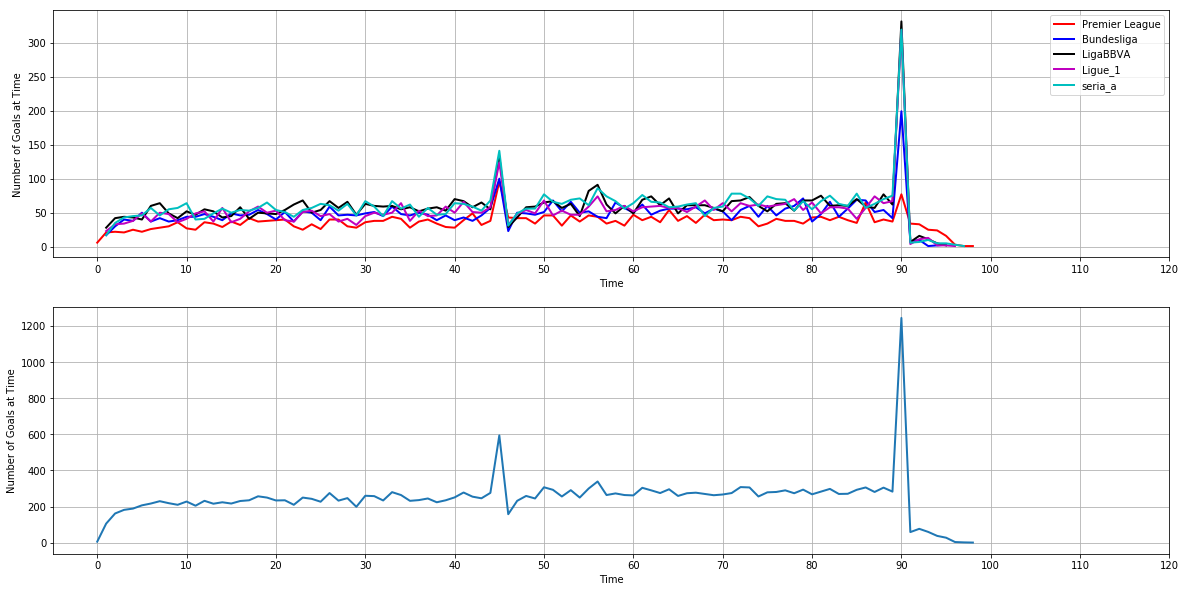

In [10]:

# visualization of sub datasets
plt.figure(figsize=(20,10))
plt.subplot(211)
plt.xlabel("Time")
plt.ylabel("Number of Goals at Time")

plt.plot(premierLeagueGoals.time,premierLeagueGoals.counts,'r',linewidth=2)

plt.plot(BundesligaGloals.time,BundesligaGloals.counts,'b',linewidth=2)

plt.plot(LigaBBVAGoals.time,LigaBBVAGoals.counts,'k',linewidth=2)

plt.plot(Ligue_1Goals.time,Ligue_1Goals.counts,'m',linewidth=2)

plt.plot(seria_aGoals.time,seria_aGoals.counts,'c',linewidth=2)
plt.legend(['Premier League','Bundesliga','LigaBBVA','Ligue_1','seria_a'])
plt.grid(True)
plt.xticks(np.arange(0, 121, 10))

plt.subplot(212)

plt.plot(TotalGoals.time,TotalGoals.counts,linewidth=2)
plt.grid(True)
plt.xlabel("Time")
plt.ylabel("Number of Goals at Time")
plt.xticks(np.arange(0, 121, 10))

There is spike in goals just before end of 1st and 2nd half.Compare to other leagues, premier league has less number of goals scored on end of 2nd halfs.

In [12]:
# no of goals scored per situations.
premierLeagueGoalsSituation = events[(events['is_goal'] == True) & (events['league']== 'PremierlLeague')].groupby('situation').size().reset_index(name='counts')
BundesligaGloalsSituations = events[(events['is_goal'] == True) & (events['league']== 'Bundesliga')].groupby('situation').size().reset_index(name='counts')
LigaBBVAGoalsSituations=  events[(events['is_goal'] == True) & (events['league']== 'LigaBBVA')].groupby('situation').size().reset_index(name='counts')
Ligue_1GoalsSituations = events[(events['is_goal'] == True) & (events['league']== 'Ligue_1')].groupby('situation').size().reset_index(name='counts')
seria_aGoalsSituations = events[(events['is_goal'] == True) & (events['league']== 'seria_a')].groupby('situation').size().reset_index(name='counts')

Text(0.5,1,'seria a')

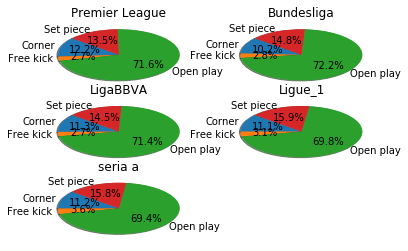

In [13]:
#visualization
plt.subplot(321)

plt.pie(premierLeagueGoalsSituation.counts,  labels=premierLeagueGoalsSituation.situation, 
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Premier League')
plt.subplot(322)

plt.pie(BundesligaGloalsSituations.counts,  labels=BundesligaGloalsSituations.situation, 
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Bundesliga')
plt.subplot(323)

plt.pie(LigaBBVAGoalsSituations.counts,  labels=LigaBBVAGoalsSituations.situation, 
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('LigaBBVA')
plt.subplot(324)

plt.pie(Ligue_1GoalsSituations.counts,  labels=Ligue_1GoalsSituations.situation, 
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Ligue_1')
plt.subplot(325)

plt.pie(seria_aGoalsSituations.counts,  labels=seria_aGoalsSituations.situation, 
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('seria a')

Most of the goals came from open play. 2nd most goals scored from set piece. Direct free Goals are very less.

In [14]:
#sub data set of no. of red cards per minute.
RedCards = events[(events['event_type2'] == 'Sending off') ].groupby('time').size().reset_index(name='counts')

([<matplotlib.axis.XTick at 0x2a220f2eb00>,
 <a list of 13 Text xticklabel objects>)

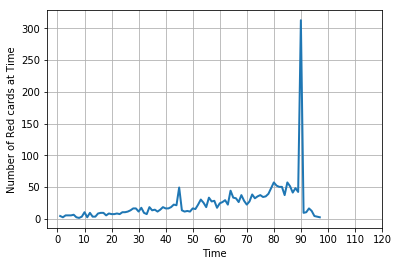

In [15]:
#visualization
plt.plot(RedCards.time,RedCards.counts,linewidth=2)
plt.grid(True)
plt.xlabel("Time")
plt.ylabel("Number of Red cards at Time")
plt.xticks(np.arange(0, 121, 10))

Chances of getting red card in early of the games are very less. Interestigly there is spike at the end of 1st and 2nd half.
for 1st half spike, red cards shown on extra time must be counted on 45th min. Red cards shown on 2nd half are greater than shown on 1st Half.
Game pressure might have caused spike on 90th minute.

In [17]:
#sub data set of no. of penalty conceded per minute.
eventspen= events[(events['event_type'] == 'Penalty conceded') ].groupby('time').size().reset_index(name='counts')

([<matplotlib.axis.XTick at 0x2a220f82978>,
 <a list of 13 Text xticklabel objects>)

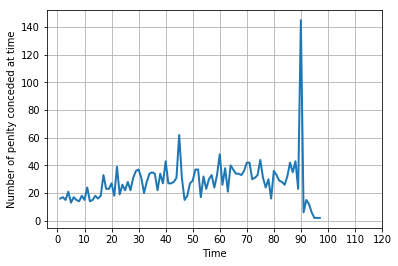

In [18]:
# visualization
plt.plot(eventspen.time,eventspen.counts,linewidth=2)
plt.grid(True)
plt.xlabel("Time")
plt.ylabel("Number of penlty conceded at time")
plt.xticks(np.arange(0, 121, 10))

Again there are two spikes.chances of conceding penaly is more at the end of the 2nd half.